<a href="https://colab.research.google.com/github/Acestal963/PRUEBA112/blob/main/preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalizador de rutinas

### **Load Data**

Primeras filas del dataset:
   participant_id        date  age gender  height_cm  weight_kg  \
0               1  2024-01-01   56      F      165.3       53.7   
1               1  2024-01-04   56      F      165.3       53.9   
2               1  2024-01-05   56      F      165.3       54.2   
3               1  2024-01-07   56      F      165.3       54.4   
4               1  2024-01-09   56      F      165.3       54.7   

     activity_type  duration_minutes intensity  calories_burned  ...  \
0          Dancing                41       Low              3.3  ...   
1         Swimming                28       Low              2.9  ...   
2         Swimming                21    Medium              2.6  ...   
3  Weight Training                99    Medium             10.7  ...   
4         Swimming               100    Medium             12.7  ...   

   stress_level  daily_steps  hydration_level   bmi  resting_heart_rate  \
0             3         7128              1.5  19.6          

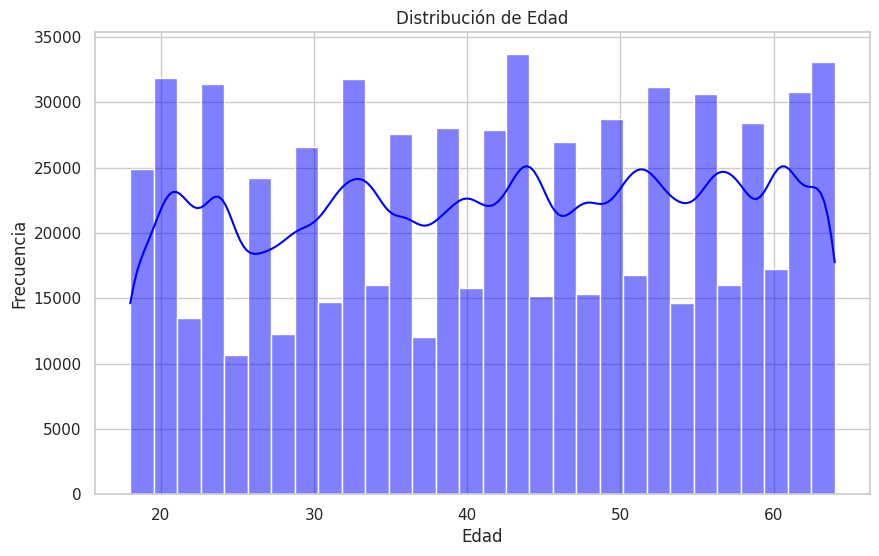

<ipython-input-6-2371f9ae6a05>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='Set2')


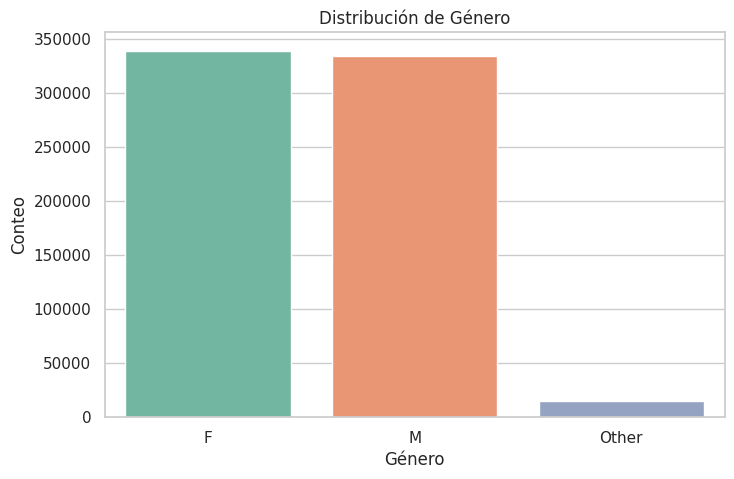

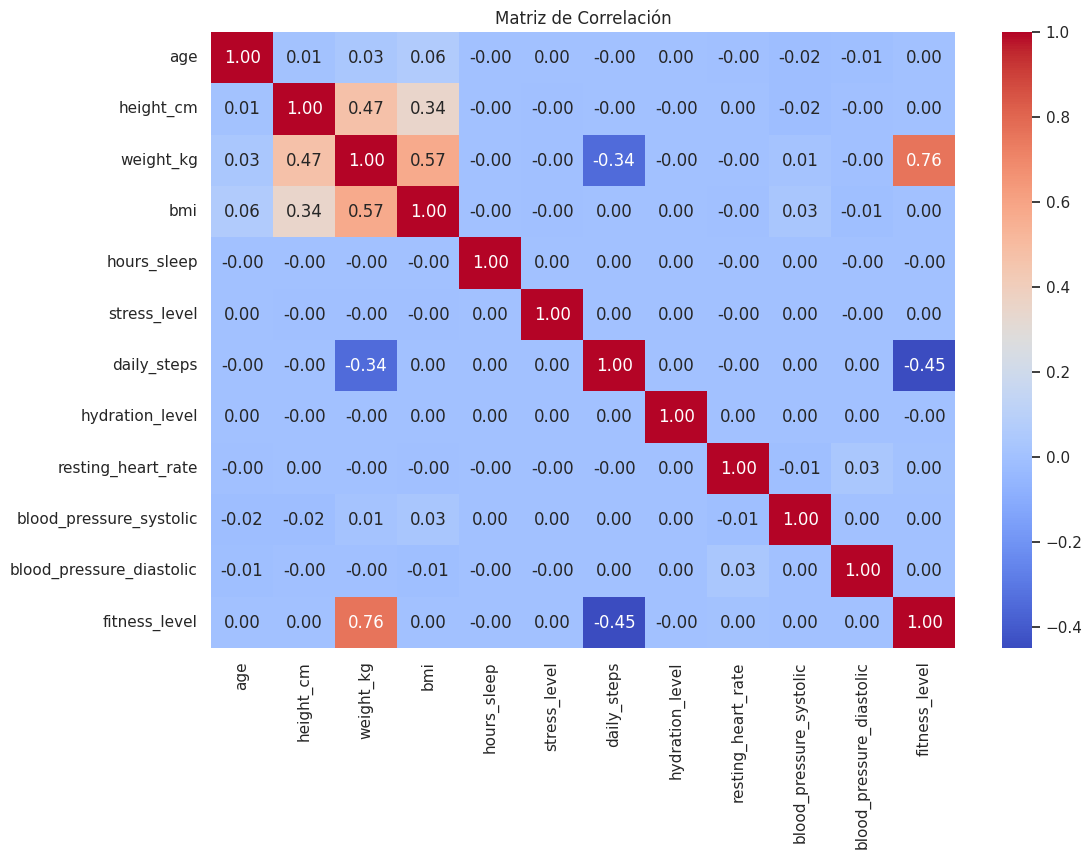


Valores nulos después de la imputación:
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64

Valores únicos de 'activity_type' y su codificación:
       activity_type  activity_type_encoded
35        Basketball                      0
100          Cycling                      1
0            Dancing                      2
5               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Configuración de visualización
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar el dataset
data = pd.read_csv("https://raw.githubusercontent.com/rodrigo-stamaria/Chatbot-de-recomendaciones-de-rutinas-de-ejercicio/refs/heads/main/Temp/healthFitnessDataset.csv?token=GHSAT0AAAAAAC5NAYAJBURFBTJ7JOUMS6J2Z6FI34A")
# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(data.head())

# Información general del dataset
print("\nInformación del dataset:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del género
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=data, palette='Set2')
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Conteo")
plt.show()


print("Correlación de variables")

numeric_features = ['age', 'height_cm', 'weight_kg', 'bmi', 'hours_sleep', 'stress_level',
                    'daily_steps', 'hydration_level', 'resting_heart_rate',
                    'blood_pressure_systolic', 'blood_pressure_diastolic', 'fitness_level']

plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

print("Un valor positivo indica una relación directa o positiva. -Un valor  negativo indica relación indirecta, inversa o negativa.- Un valor nulo indica que no existe una tendencia entre ambas variabes.\nLa variable fitness_level solo tiene relación positiva con dos variables: weight_kg, y calories_burned, por lo cual no es una variable importante a considerar para el desarrollo del modelo.")

# Eliminar columnas no relevantes
data = data.drop(columns=["participant_id", "date"])

# Manejo de valores faltantes
data = data.fillna({
    'height_cm': data['height_cm'].median(),
    'weight_kg': data['weight_kg'].median(),
    'bmi': data['bmi'].median(),
    'hours_sleep': data['hours_sleep'].median(),
    'stress_level': data['stress_level'].median(),
    'hydration_level': data['hydration_level'].median(),
    'resting_heart_rate': data['resting_heart_rate'].median(),
    'blood_pressure_systolic': data['blood_pressure_systolic'].median(),
    'blood_pressure_diastolic': data['blood_pressure_diastolic'].median()
})

# Verificar si quedan valores nulos
print("\nValores nulos después de la imputación:")
print(data.isnull().sum())

# Codificar la variable objetivo (activity_type)
label_encoder = LabelEncoder()
data['activity_type_encoded'] = label_encoder.fit_transform(data['activity_type'])

# Verificar la codificación
print("\nValores únicos de 'activity_type' y su codificación:")
print(data[['activity_type', 'activity_type_encoded']].drop_duplicates().sort_values(by='activity_type_encoded'))

# Definir variables categóricas y numéricas
categorical_features = ['gender', 'intensity', 'health_condition', 'smoking_status']
numeric_features = ['age', 'height_cm', 'weight_kg', 'bmi', 'hours_sleep', 'stress_level',
                    'daily_steps', 'hydration_level', 'resting_heart_rate',
                    'blood_pressure_systolic', 'blood_pressure_diastolic', 'fitness_level']

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['activity_type', 'activity_type_encoded'])
y = data['activity_type_encoded']

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Mostrar las primeras filas de los datos procesados
print("\nDatos procesados (primeras filas):")
print(X_processed[:5])

# Mostrar la forma de los datos procesados
print("\nForma de X_processed:", X_processed.shape)
print("Forma de y:", y.shape)